<a href="https://colab.research.google.com/github/Naimish240/ExoplanetSearch/blob/main/TESS_TOI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exoplanet Detection with TESS and Lightkurve**
***
By : [Naimish Mani B](https://www.linkedin.com/in/naimish-balaji-a6182b180/)
***

## **Introduction**

For as long as humans have existed, we have constantly looked up at the heavens above and asked ourselves the question, “Are we alone?”. To answer this question, scientists came up with the assumption that if life were to exist somewhere out there, it’d make sense to look for it on other planets. So, they started pointing their telescopes up at the night sky to find extra terrestrial planets (aka exoplanets).

Since a parent star is much brighter than the planets orbiting it (case in point, our solar system), the light being reflected off the planet is extremely faint, as compared to the parent star. Hence, it is extremely difficult to observe an exoplanet directly through a telescope, let alone resolve it. Instead, astronomers have generally had to resort to indirect methods to detect exoplanets. One common method used to detect exoplanets is the "Transit Method". 


## **The Transit Method**

When an opaque object passes between the observer and a light source, the brightness of the light source takes a slight decrease. This is what we observe during an eclipse, after all. But unlike on Earth, instead of the Sun completely vanishing, the dips in brightness are relatively very small when observing far flung stars in hopes of detecting the presence of their exoplanets. Also, we can only observe this dip in brightness if the observer, the star, and the planet are all oriented in the same direction. Despite this setback, this method is still very commonly employed to find exoplanets in distant star systems.


<img src=https://qphs.fs.quoracdn.net/main-qimg-4da9f35585fc502d62e8eac5a076b0cc>



## **Transiting Exoplanet Survey Satellite**

The Transiting Exoplanet Survey Satellite (TESS) is a space telescope NASA designed to search for exoplanets using the transit method. TESS is the successor to the Kepler Space Telescope, another (now retired) exoplanet detecting satellite. The primary mission objective for TESS is to study the brightest stars near the Earth for transiting exoplanets over a two-year period. The TESS satellite uses an array of wide-field cameras to perform a survey of 85% of the sky.


## **This Notebook's Objective**

This notebook aims to walk through the general procedure for processing data from the TESS satellite using [Lightkurve](https://docs.lightkurve.org/), a user-friendly Python package for making discoveries with TESS and Kepler data.

## **Setup**

Before using lightkurve, we first need to install it with `pip install lightkurve`. Other dependancies include:

- numpy
- matplotlib
- pandas (optional)
- seaborn (optional)

Also, we make use of [this](https://exofop.ipac.caltech.edu/tess/view_toi.php) website for a list of about 4000 exoplanet targets of interest to narrow down our search from millions of TESS records down to a few thousand.

### Install Lightkurve

In [4]:
!pip install lightkurve

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation # If animating targetpixelfile
import seaborn as sns
import lightkurve as lk
from time import sleep
import random

random.seed(42)

### Load TESS Targets of Interest Corpus

In [6]:
# Get file from https://exofop.ipac.caltech.edu/tess/view_toi.php

df = pd.read_csv('/content/exofop_tess_tois.csv', skiprows=1)
df.head()

,TIC ID,TOI,CTOI,Master priority,SG1A priority,SG1B priority,SG2 priority,SG3 priority,SG4 priority,SG5 priority,ACWG ESM,ACWG TSM,Time Series Observations,Spectroscopy Observations,Imaging Observations,TESS Disposition,TFOPWG Disposition,TESS mag,TESS mag error,Pipeline Signal ID,Source,RA (deg),Dec (deg),PM RA (mas/yr),PM RA error,PM Dec (mas/yr),PM Dec error,Transit Epoch (BJD),Transit Epoch error,Period (days),Period error,Duration (hours),Duration error,Depth (mmag),Depth (mmag) error,Depth (ppm),Depth (ppm) error,Planet Radius (R_Earth),Planet Radius error,Planet Insolation (Earth flux),Planet Eq Temp (K),Planet SNR,Stellar Distance (pc),Stellar Distance error,Stellar Teff (K),Stellar Teff error,Stellar log(g) (cm/s2),Stellar log(g) error,Stellar Radius (R_Sun),Stellar Radius error,Stellar Metallicity,Stellar Metallicity error,Sectors,Comments,Date TOI Alerted (by TESS Project),Date TOI Updated (by TESS Project),Date Modified (by ExoFOP-TESS)
0,50365310,1000.01,NaN,5,5,5,5,5,5,5,12.0,64.5,0,0,5,PC,FP,9.604000,0.013,1,qlp,112.357708,-12.695960,-5.964,0.085,-0.076,0.072,2.458493e+06,0.003870,2.171530,0.000680,1.937000,0.230000,0.782012,0.001527,720.000000,1.406120,5.564800,0.338744,6563.750000,2507.000000,20.00000,485.735,11.9515,10249.0,264.7,4.19,0.07,2.17000,0.07,NaN,NaN,7,NaN,2019-03-26,2020-05-20,2021-06-01
1,88863718,1001.01,NaN,3,4,3,3,4,4,4,23.7,157.0,0,0,5,PC,PC,9.423440,0.006,1,qlp,122.580465,-5.513852,-4.956,0.102,-15.555,0.072,2.459250e+06,0.001925,1.931671,0.000008,3.180000,0.173000,1.118885,0.225672,1030.000000,207.830000,10.316800,3.214590,42432.800000,3998.000000,33.00000,295.862,5.9100,7070.0,126.4,4.03,0.09,2.01000,0.09,NaN,NaN,"7,34",v-shaped,2019-03-26,2021-06-11,2021-06-21
2,124709665,1002.01,NaN,5,5,5,5,5,5,5,73.5,408.0,3,1,3,EB,FP,9.299501,0.058,1,spoc,104.726966,-10.580455,-1.462,0.206,-2.249,0.206,2.459202e+06,0.001161,1.867588,0.000152,2.211864,0.094625,1.800717,0.075002,1657.147109,69.077340,36.432872,21.315702,20641.445701,3057.065736,24.86858,943.109,106.3330,8924.0,124.0,NaN,NaN,5.73255,NaN,NaN,NaN,"7,33",TFOP FP; retired as NEB,2019-03-26,2021-04-07,2021-06-01
3,106997505,1003.01,NaN,5,5,5,5,5,5,5,105.3,662.1,0,3,1,PC,FP,9.300300,0.037,1,qlp,110.559945,-25.207017,-0.939,0.041,1.640,0.055,2.458493e+06,0.005350,2.743230,0.001080,3.167000,0.642000,0.416362,0.000849,383.410004,0.781988,NaN,NaN,1177.359985,1631.000000,14.00000,7728.170,1899.5700,5388.5,567.0,4.15,1.64,NaN,NaN,NaN,NaN,7,No Gaia DR2 radius but might be evolved so tra...,2019-03-26,2019-12-17,2021-06-01
4,238597883,1004.01,NaN,5,5,5,5,5,5,5,8.8,56.0,0,1,1,PC,FP,9.135500,0.006,1,qlp,122.178195,-48.802811,-4.496,0.069,9.347,0.062,2.458494e+06,0.006530,3.574910,0.001460,2.576000,0.346000,0.543004,0.001172,500.000000,1.079660,4.752760,0.279769,2929.870000,2049.000000,17.00000,356.437,4.6175,9219.0,171.1,4.14,0.07,2.15000,0.06,NaN,NaN,"7,9",NaN,2019-03-26,2020-05-20,2021-06-01


In [7]:
df.describe()

,TIC ID,TOI,Master priority,SG1A priority,SG1B priority,SG2 priority,SG3 priority,SG4 priority,SG5 priority,ACWG ESM,ACWG TSM,Time Series Observations,Spectroscopy Observations,Imaging Observations,TESS mag,TESS mag error,Pipeline Signal ID,RA (deg),Dec (deg),PM RA (mas/yr),PM RA error,PM Dec (mas/yr),PM Dec error,Transit Epoch (BJD),Transit Epoch error,Period (days),Period error,Duration (hours),Duration error,Depth (mmag),Depth (mmag) error,Depth (ppm),Depth (ppm) error,Planet Radius (R_Earth),Planet Radius error,Planet Insolation (Earth flux),Planet Eq Temp (K),Planet SNR,Stellar Distance (pc),Stellar Distance error,Stellar Teff (K),Stellar Teff error,Stellar log(g) (cm/s2),Stellar log(g) error,Stellar Radius (R_Sun),Stellar Radius error,Stellar Metallicity,Stellar Metallicity error
count,4.436000e+03,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4430.000000,4430.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4342.000000,4342.000000,4342.000000,4342.000000,4.436000e+03,4436.000000,4352.000000,4316.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4038.000000,3447.000000,4258.000000,4179.000000,4436.000000,4284.000000,3944.000000,4333.000000,4089.000000,3799.000000,3090.000000,4037.000000,3320.000000,717.000000,717.000000
mean,2.476023e+08,2212.630568,3.211452,4.326871,3.488729,3.307259,2.817178,4.233995,4.254283,39.697246,142.825282,1.683048,1.689585,1.488052,11.280971,0.010724,1.041704,167.958108,-4.918955,0.610553,0.265273,-8.458870,0.260528,2.458839e+06,0.003476,10.368919,0.000645,2.972357,0.317584,8.572472,0.285331,7728.565743,259.983143,10.474504,1.740875,2596.430564,1366.472679,39.462224,473.756458,26.100973,5879.922913,240.474678,4.296578,0.231265,1.468574,0.093767,-0.019067,0.062067
std,1.745741e+08,1243.484574,1.206115,0.469123,1.233179,1.159657,1.614669,0.492815,0.460177,98.723489,1685.876232,3.634929,4.647133,2.127204,1.629663,0.041002,0.242723,100.725697,50.332863,81.581154,0.683860,76.487766,0.672304,3.007398e+02,0.042181,49.647815,0.001350,1.768909,0.284714,19.122138,2.596658,14687.091961,2295.907960,9.352602,3.203588,10749.130797,718.442924,78.622525,670.923144,181.133489,1699.978515,669.568437,0.319209,0.430299,2.029547,0.148274,0.267650,0.040284
min,2.876000e+03,101.010000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.300000,0.000000,0.000000,0.000000,4.627800,0.000000,1.000000,0.129574,-89.471513,-1624.050000,0.015000,-1230.620000,0.016000,2.458325e+06,0.000000,0.184692,0.000001,0.162000,0.000000,0.021318,0.000000,19.634186,0.000000,0.552507,0.044817,0.033452,109.075052,6.000000,6.531270,0.002835,2808.000000,7.824290,0.100000,0.000391,0.128000,0.003966,-1.300000,0.003993
25%,1.383538e+08,1134.760000,3.000000,4.000000,3.000000,3.000000,1.000000,4.000000,4.000000,8.800000,42.500000,0.000000,0.000000,0.000000,10.142550,0.006000,1.000000,89.563333,-49.758534,-11.642500,0.039000,-14.059750,0.039000,2.458620e+06,0.001100,2.186185,0.000030,1.837340,0.145799,1.325355,0.004033,1219.952677,3.713815,4.080157,0.512599,114.566250,881.641598,12.000000,163.431000,0.810750,5229.000000,122.000000,4.120000,0.080000,0.910000,0.050000,-0.166968,0.023643
50%,2.397277e+08,2193.510000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,22.800000,67.300000,0.000000,0.000000,1.000000,11.362850,0.006000,1.000000,147.077298,-17.439414,-2.125500,0.050000,-2.386000,0.050000,2.458791e+06,0.002120,3.771005,0.000180,2.672500,0.266336,4.902292,0.018661,4505.000000,17.186602,10.464200,0.783399,470.431326,1257.000000,18.583286,340.015500,3.496750,5816.000000,130.700000,4.325770,0.090000,1.250000,0.060733,0.016956,0.059793
75%,3.502951e+08,3289.260000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,46.400000,114.775000,2.000000,2.000000,3.000000,12.663500,0.007000,1.000000,260.797887,46.327537,8.694750,0.081000,6.996500,0.074000,2.459133e+06,0.003672,7.062

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TIC ID                              4436 non-null   int64  
 1   TOI                                 4436 non-null   float64
 2   CTOI                                364 non-null    object 
 3   Master priority                     4436 non-null   int64  
 4   SG1A priority                       4436 non-null   int64  
 5   SG1B priority                       4436 non-null   int64  
 6   SG2 priority                        4436 non-null   int64  
 7   SG3 priority                        4436 non-null   int64  
 8   SG4 priority                        4436 non-null   int64  
 9   SG5 priority                        4436 non-null   int64  
 10  ACWG ESM                            4430 non-null   float64
 11  ACWG TSM                            4430 no

## **Exploratory Data Analysis**

The objective of Exploratory Data Analysis (EDA) is to summarize the main characteristics of a given dataset, through data visualization methods like graphs.

Here, we use EDA to infer parameters to narrow our needle-in-a-haystack search, for down the line processing.

In [9]:
plt.style.use('seaborn-whitegrid')

### Bird's eye view

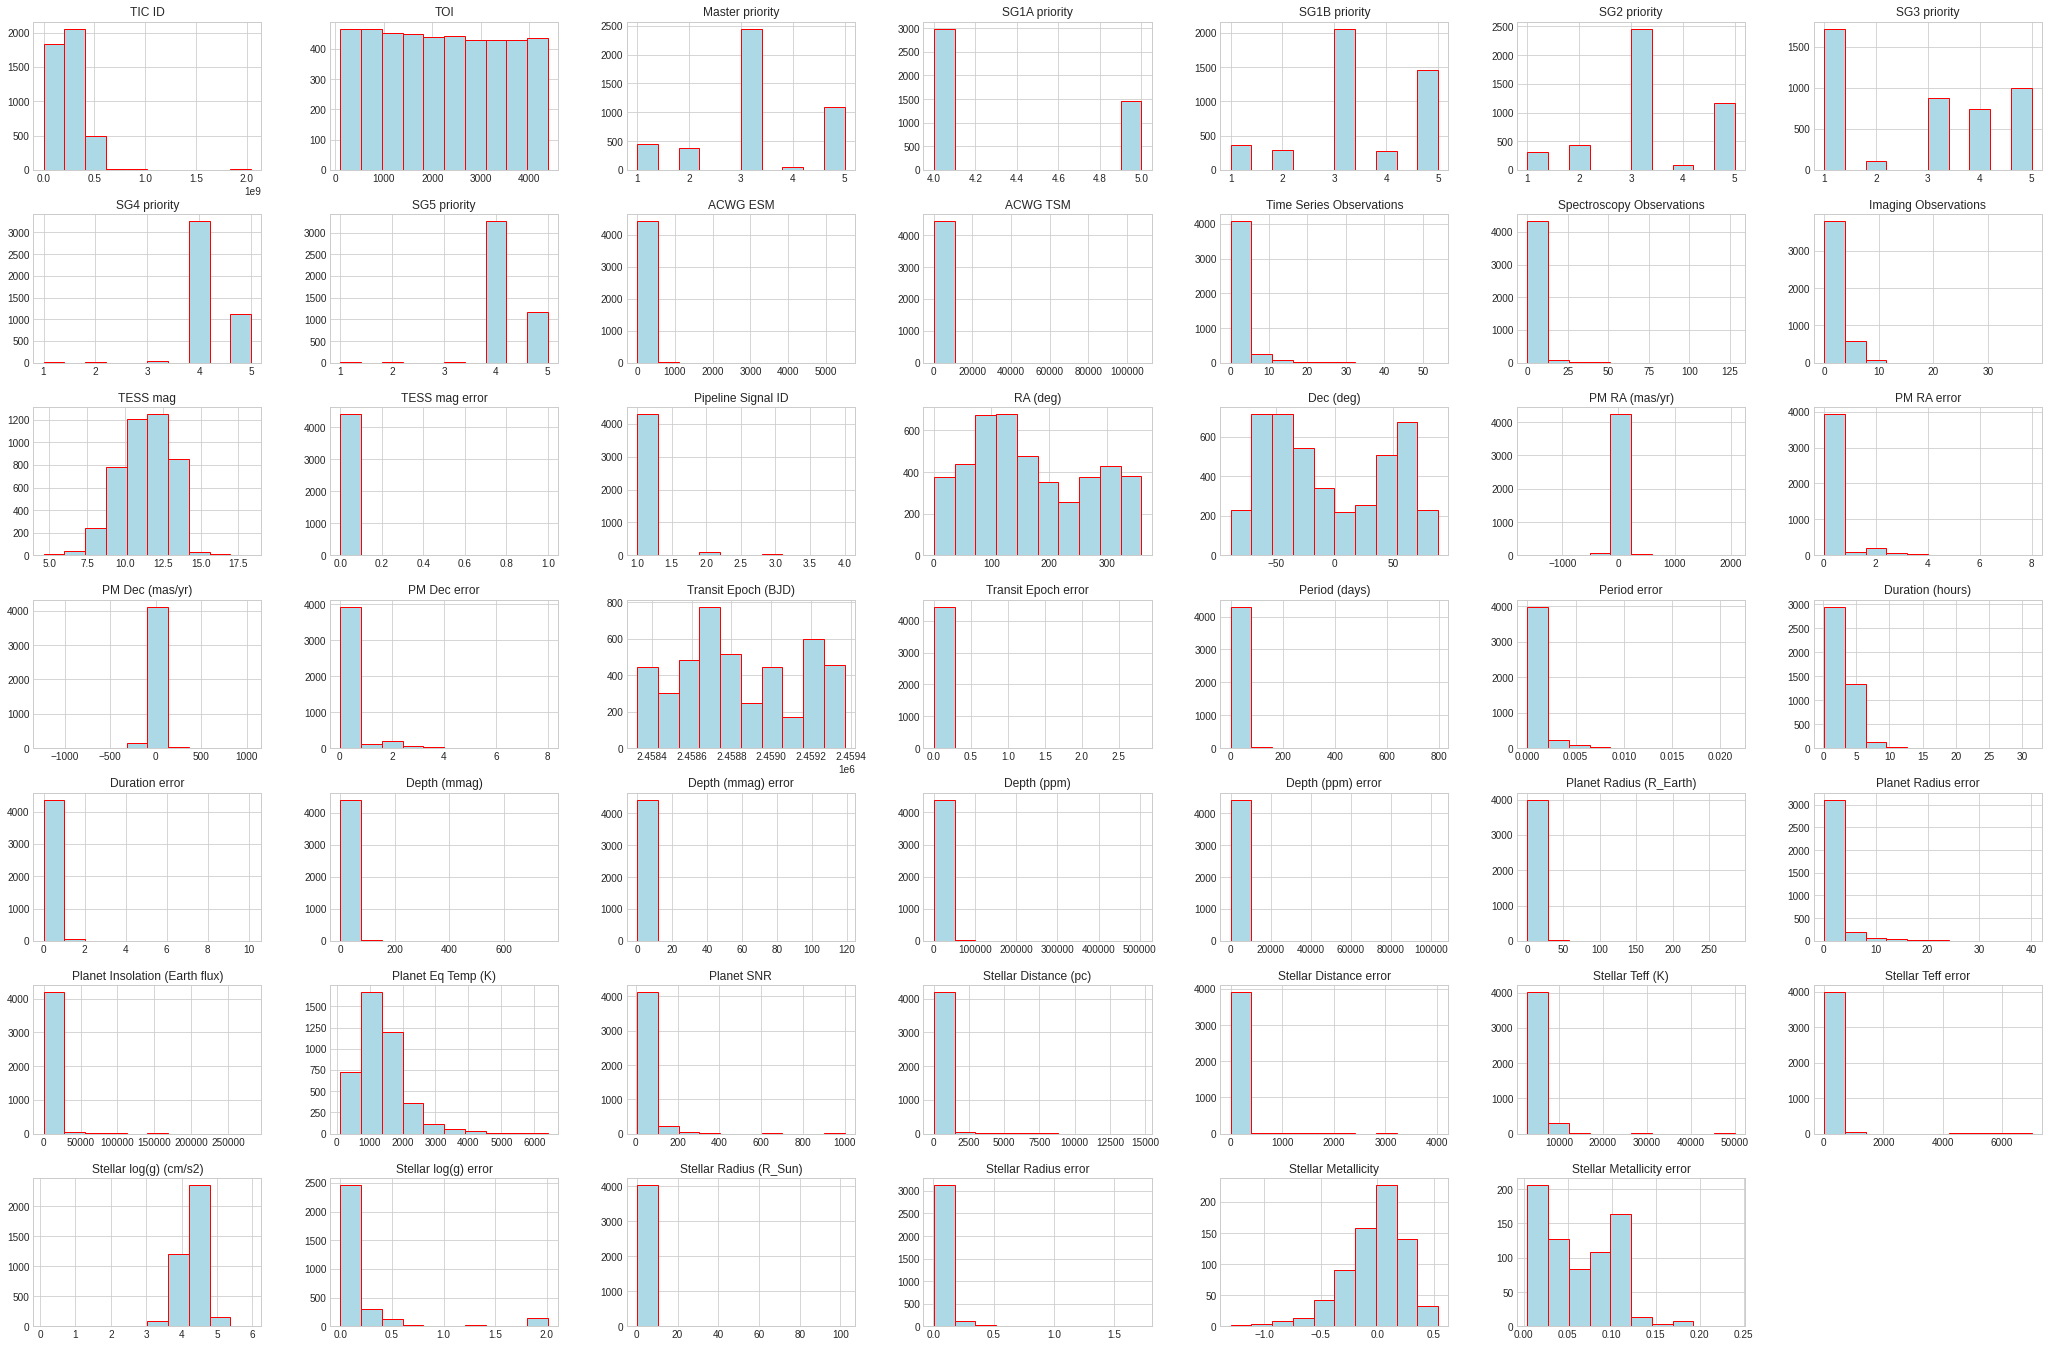

In [10]:
df.hist(figsize=(36, 24), color='lightblue', edgecolor='red')

plt.show()

### Function to plot individual Graphs

In [11]:
# Plots the InterQuartile Range
def plotGraph(col):
  # Print's data frame's description
  print(df[col].describe())
  # Gets bounds of Q1 and Q3
  arr = list(df[col].describe())
  low = arr[4]
  high = arr[6]

  # Filters df for required rows, with a 10% value margin
  foo = df[df[col].between(low-(0.1*low), high+(0.1*high)) == True]

  # Plots Histogram
  foo[col].hist(figsize=(6, 4), color='lightblue', edgecolor='red')
  plt.xlabel(col)
  plt.ylabel("Number of objects")
  plt.show()

### Orbital Period Graph


count    4352.000000
mean       10.368919
std        49.647815
min         0.184692
25%         2.186185
50%         3.771005
75%         7.062058
max       796.418000
Name: Period (days), dtype: float64


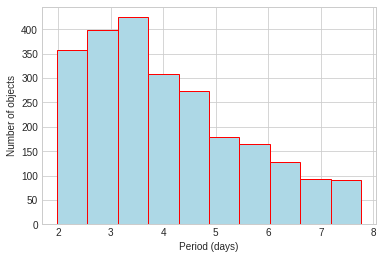

In [12]:
plotGraph('Period (days)')

### Transit Duration Graph

count    4436.000000
mean        2.972357
std         1.768909
min         0.162000
25%         1.837340
50%         2.672500
75%         3.701000
max        31.414000
Name: Duration (hours), dtype: float64


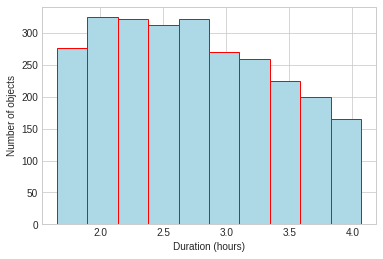

In [13]:
plotGraph('Duration (hours)')

### Stellar Distance Graph

count     4284.000000
mean       473.756458
std        670.923144
min          6.531270
25%        163.431000
50%        340.015500
75%        607.961500
max      14728.300000
Name: Stellar Distance (pc), dtype: float64


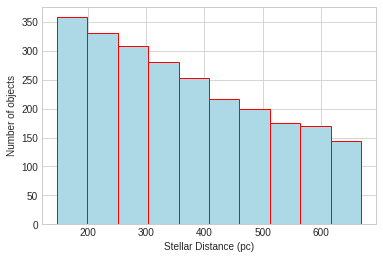

In [14]:
plotGraph('Stellar Distance (pc)')

### Stellar Effective Temperature Graph

count     4333.000000
mean      5879.922913
std       1699.978515
min       2808.000000
25%       5229.000000
50%       5816.000000
75%       6329.000000
max      50000.000000
Name: Stellar Teff (K), dtype: float64


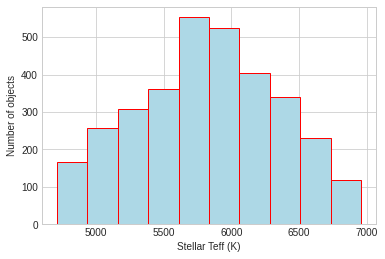

In [15]:
plotGraph('Stellar Teff (K)')

### Stellar Radius Graph

count    4037.000000
mean        1.468574
std         2.029547
min         0.128000
25%         0.910000
50%         1.250000
75%         1.690000
max       102.030000
Name: Stellar Radius (R_Sun), dtype: float64


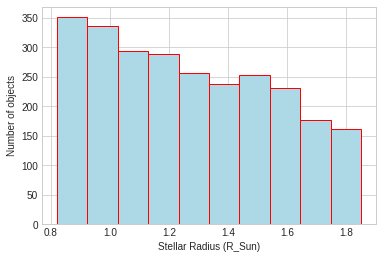

In [16]:
plotGraph('Stellar Radius (R_Sun)')

### Stellar Surface Gravity Graph (log g)

count    3799.000000
mean        4.296578
std         0.319209
min         0.100000
25%         4.120000
50%         4.325770
75%         4.490000
max         5.960650
Name: Stellar log(g) (cm/s2), dtype: float64


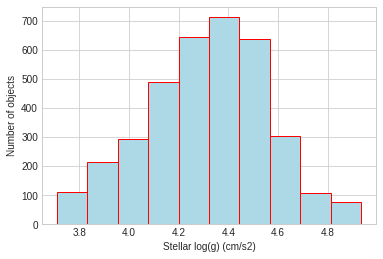

In [17]:
plotGraph('Stellar log(g) (cm/s2)')

## **Infered Parameters from EDA**

From these plots, we can get the following parameters

1. Filter parameters for target selection
    - Stellar Distance : 150 - 300 parsecs
    - Star Effective Temperature : 5000 - 6500 kelvin
    - Star Radius : 0.8 - 1.75 R_Sun
    - Star Surface Gravity : 3.75 - 5 log(g)

2. Folding parameters for target visualisation
    - Orbital Period : 0.5 - 15 Days

We subsequently make use of these parameters when searching for candidates on [the data portal](https://exofop.ipac.caltech.edu/tess/search.php)

## **Processing and Analysis of targets**

There are 6 steps to process the TESS data. They are as follows:

1. Downloading the Data for a star
2. Converting the downloaded data into Lightcurves
3. Flattening the Lightcurve, to ensure uniformity
4. Generate Periodogram for the flattened lightcurve, to get the period of the lightcurve
5. Fold the data with the period from the periodogram as the folding period
6. Bin the folded data to make the graph easier to read

### Functions to Process Stars

In [18]:
def downloadTarget(star):
  data = lk.search_targetpixelfile(star).download(quality_bitmask='hardest')
  sleep(2)
  
  print("Downloaded data for star ", star)
  print("Number of frames : ", len(data))
  return data

def processTarget(star, data):
  # Data to lightcurve
  lc = data.to_lightcurve(aperture_mask='all')
  # Flatten Lightcurve
  flattened_lc = lc.flatten(window_length=401)
  # Generate Periodogram
  periodogram = flattened_lc.to_periodogram(method="bls", period=np.arange(0.5, 15, 0.001))
  best_fit_period = periodogram.period_at_max_power
  print("Best Fitting Period is {:.3f}".format(best_fit_period))
  # Fold the lightcurve according to period
  folded_lc = flattened_lc.fold(period=best_fit_period)
  # Bin the flattened light curve
  binned_lc = folded_lc.bin(time_bin_size=0.01)

  lc.scatter()
  plt.title("Light Curve Scatter Plot")
  plt.show()

  flattened_lc.scatter()
  plt.title("Flattened Light Curve Scatter Plot")
  plt.show()

  periodogram.plot()
  plt.title("Periodogram")
  plt.show()

  folded_lc.scatter()
  plt.title("Folded Light Curve Plot")
  plt.show()

  binned_lc.plot()
  plt.title(star)
  plt.show()

In [19]:
# Create Filter

filtered_df = df[(df["Stellar Distance (pc)"].between(150, 300) == True) &
                 (df["Stellar Teff (K)"].between(5000, 6500) == True) &
                 (df["Stellar Radius (R_Sun)"].between(0.80, 1.75) == True) &
                 (df["Stellar log(g) (cm/s2)"].between(3.75, 5.00) == True)]

targets = ['TESS ' + str(i) for i in filtered_df['TIC ID']]
print("Found ", len(targets), "matching targets")

sampled_targets = random.sample(targets, 3)
print("Sampled 3 stars randomly")

Found  524 matching targets
Sampled 3 stars randomly


### Analysing TESS 149603524

In [20]:
star = targets[0]
df[df["TIC ID"] == int(star[5:])]

,TIC ID,TOI,CTOI,Master priority,SG1A priority,SG1B priority,SG2 priority,SG3 priority,SG4 priority,SG5 priority,ACWG ESM,ACWG TSM,Time Series Observations,Spectroscopy Observations,Imaging Observations,TESS Disposition,TFOPWG Disposition,TESS mag,TESS mag error,Pipeline Signal ID,Source,RA (deg),Dec (deg),PM RA (mas/yr),PM RA error,PM Dec (mas/yr),PM Dec error,Transit Epoch (BJD),Transit Epoch error,Period (days),Period error,Duration (hours),Duration error,Depth (mmag),Depth (mmag) error,Depth (ppm),Depth (ppm) error,Planet Radius (R_Earth),Planet Radius error,Planet Insolation (Earth flux),Planet Eq Temp (K),Planet SNR,Stellar Distance (pc),Stellar Distance error,Stellar Teff (K),Stellar Teff error,Stellar log(g) (cm/s2),Stellar log(g) error,Stellar Radius (R_Sun),Stellar Radius error,Stellar Metallicity,Stellar Metallicity error,Sectors,Comments,Date TOI Alerted (by TESS Project),Date TOI Updated (by TESS Project),Date Modified (by ExoFOP-TESS)
21,149603524,102.01,NaN,5,5,5,5,5,5,5,137.5,149.7,1,2,1,KP,KP,9.7109,0.006,1,spoc,87.139821,-63.988329,-15.641,0.037,26.046,0.037,2.459363e+06,0.000208,4.411982,0.000058,3.783739,0.016277,15.093294,0.068711,13805.258269,63.283554,14.576962,0.653555,673.780826,1299.419595,202.13478,175.631,0.588,6280.0,NaN,4.32092,NaN,1.21427,0.054221,0.24,0.05,"1,2,3,4,6,7,8,9,10,11,12,13,27,28,29,30,31,32,...",WASP 62 b,2018-09-05,2021-08-17,2021-08-18


/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 50 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


Downloaded data for star  TESS 149603524
Number of frames :  18278
Best Fitting Period is 4.413 d


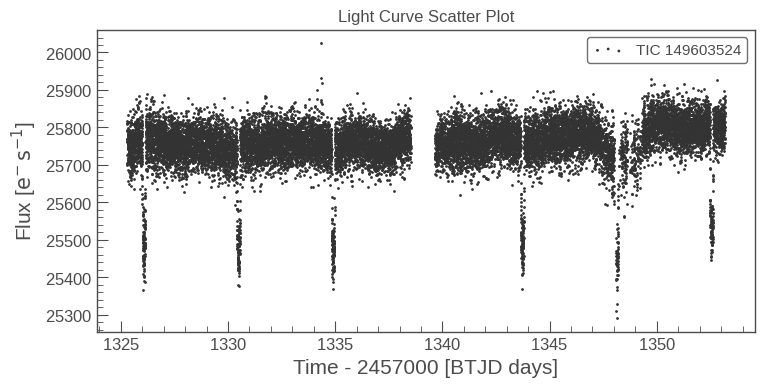

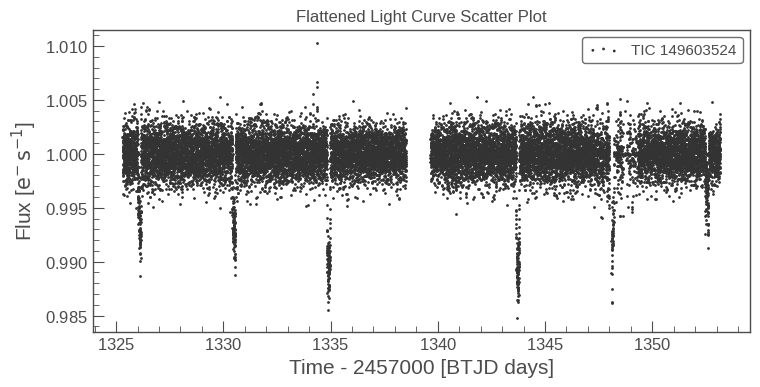

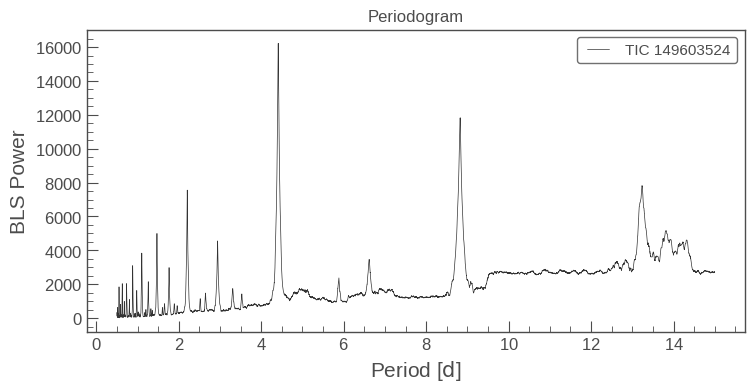

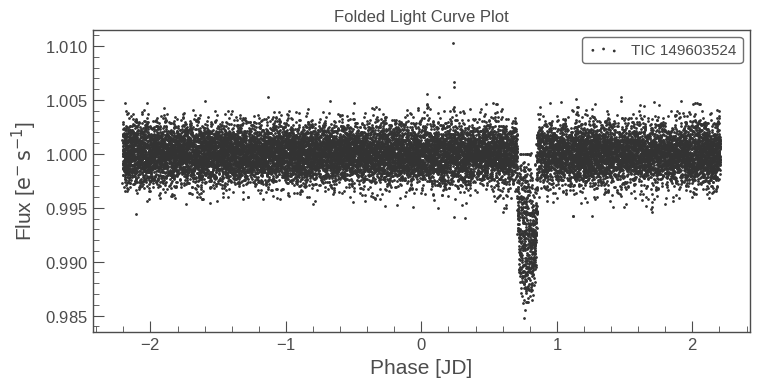

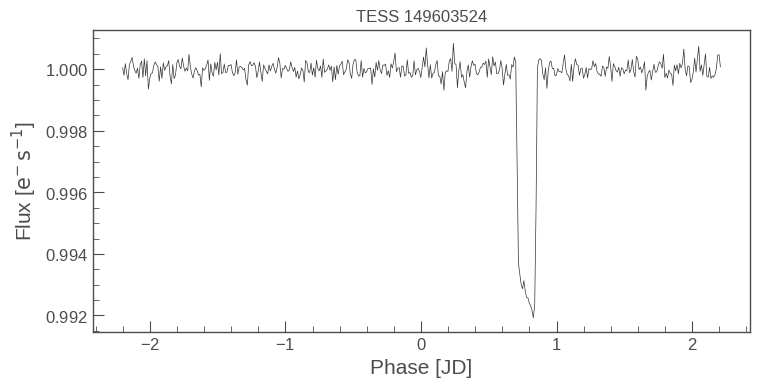

In [21]:
data = downloadTarget(star)
processTarget(star, data)

From this, we can see that the star has an exoplanet orbiting it, as there is a clear 'u' shaped dip in the flux vs phase diagram.

- Orbital period is 4.413 
- Transit Midpoint time is 1335 BJD

### Analysing TESS 143994283

In [22]:
star = targets[1]
df[df["TIC ID"] == int(star[5:])]

,TIC ID,TOI,CTOI,Master priority,SG1A priority,SG1B priority,SG2 priority,SG3 priority,SG4 priority,SG5 priority,ACWG ESM,ACWG TSM,Time Series Observations,Spectroscopy Observations,Imaging Observations,TESS Disposition,TFOPWG Disposition,TESS mag,TESS mag error,Pipeline Signal ID,Source,RA (deg),Dec (deg),PM RA (mas/yr),PM RA error,PM Dec (mas/yr),PM Dec error,Transit Epoch (BJD),Transit Epoch error,Period (days),Period error,Duration (hours),Duration error,Depth (mmag),Depth (mmag) error,Depth (ppm),Depth (ppm) error,Planet Radius (R_Earth),Planet Radius error,Planet Insolation (Earth flux),Planet Eq Temp (K),Planet SNR,Stellar Distance (pc),Stellar Distance error,Stellar Teff (K),Stellar Teff error,Stellar log(g) (cm/s2),Stellar log(g) error,Stellar Radius (R_Sun),Stellar Radius error,Stellar Metallicity,Stellar Metallicity error,Sectors,Comments,Date TOI Alerted (by TESS Project),Date TOI Updated (by TESS Project),Date Modified (by ExoFOP-TESS)
23,143994283,1021.01,NaN,5,5,5,5,5,5,5,6.3,51.6,1,2,1,PC,FP,10.5551,0.006,1,qlp,119.30075,-42.999149,-3.211,0.046,-15.082,0.051,2.458493e+06,0.00426,1.90879,0.00035,1.909,0.231,0.671716,0.001561,618.481995,1.43774,3.34688,0.217749,985.807007,1561.0,14.0,235.974,1.579,6022.600098,133.5,4.52,0.39,1.22,0.05,NaN,NaN,8,NaN,2019-04-01,2019-12-17,2021-06-01


/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


Downloaded data for star  TESS 143994283
Number of frames :  1086
Best Fitting Period is 6.534 d


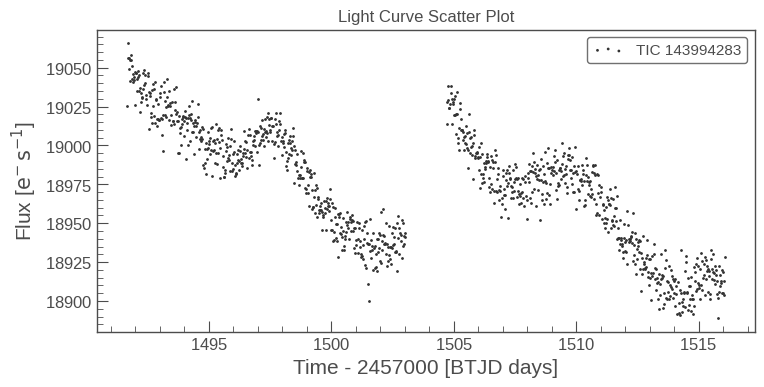

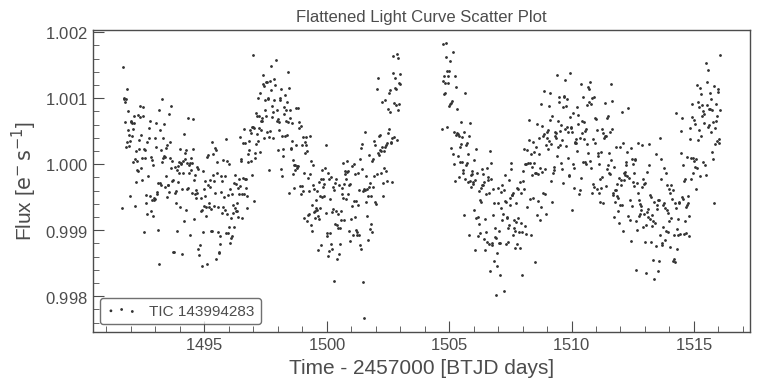

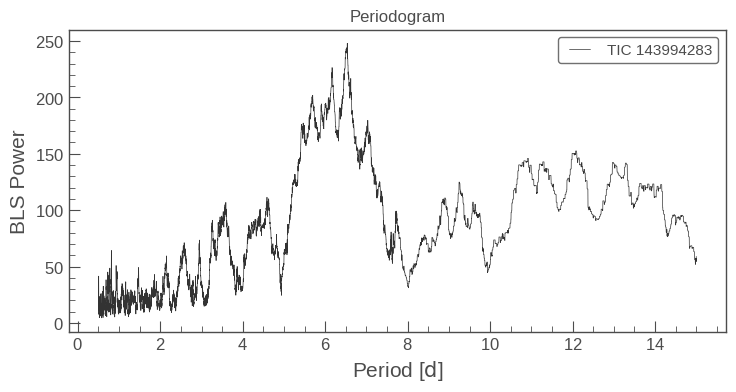

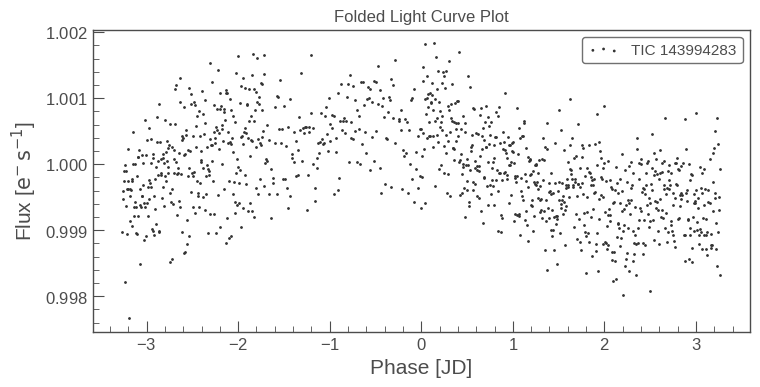

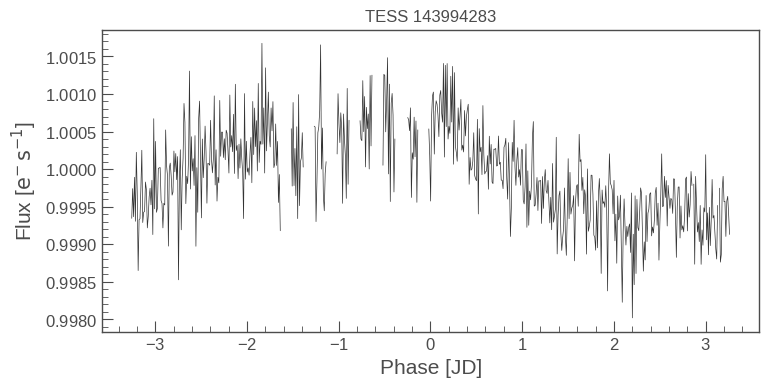

In [23]:
data = downloadTarget(star)
processTarget(star, data)

Here, we can see that flattening the lightcurve made it easier to visualise the data.

We can also see that despite folding for the maximum period from the periodogram, the data does not indicate the presence of a exoplanet.

### Analysing TESS 146172354

In [24]:
star = targets[2]
df[df["TIC ID"] == int(star[5:])]

,TIC ID,TOI,CTOI,Master priority,SG1A priority,SG1B priority,SG2 priority,SG3 priority,SG4 priority,SG5 priority,ACWG ESM,ACWG TSM,Time Series Observations,Spectroscopy Observations,Imaging Observations,TESS Disposition,TFOPWG Disposition,TESS mag,TESS mag error,Pipeline Signal ID,Source,RA (deg),Dec (deg),PM RA (mas/yr),PM RA error,PM Dec (mas/yr),PM Dec error,Transit Epoch (BJD),Transit Epoch error,Period (days),Period error,Duration (hours),Duration error,Depth (mmag),Depth (mmag) error,Depth (ppm),Depth (ppm) error,Planet Radius (R_Earth),Planet Radius error,Planet Insolation (Earth flux),Planet Eq Temp (K),Planet SNR,Stellar Distance (pc),Stellar Distance error,Stellar Teff (K),Stellar Teff error,Stellar log(g) (cm/s2),Stellar log(g) error,Stellar Radius (R_Sun),Stellar Radius error,Stellar Metallicity,Stellar Metallicity error,Sectors,Comments,Date TOI Alerted (by TESS Project),Date TOI Updated (by TESS Project),Date Modified (by ExoFOP-TESS)
40,146172354,1036.01,NaN,3,4,3,3,3,4,4,21.3,93.7,4,0,5,PC,PC,10.2855,0.006,1,qlp,157.867112,-42.240448,10.992,0.037,-57.748,0.049,2.459304e+06,0.001828,3.779536,0.000013,3.238,0.499,2.5436,0.003898,2340.0,3.59016,6.10966,0.392505,973.181,1556.0,40.0,184.015,0.962,5771.0,132.3,4.31,0.08,1.18,0.06,NaN,NaN,"9,36",need SG1 to check the other two stars in the s...,2019-06-11,2021-06-03,2021-06-04


/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


Downloaded data for star  TESS 146172354
Number of frames :  88318
Best Fitting Period is 9.597 d


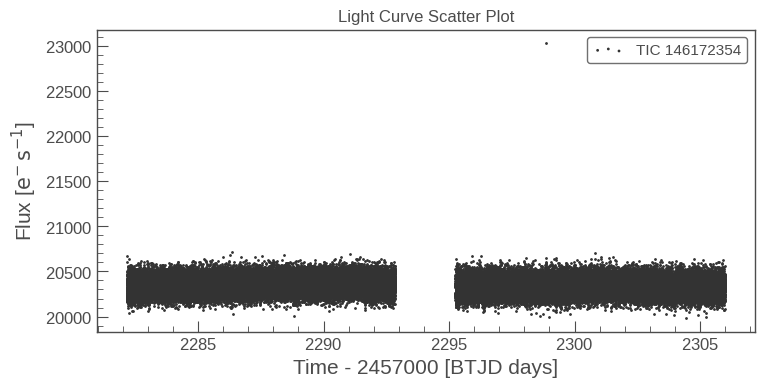

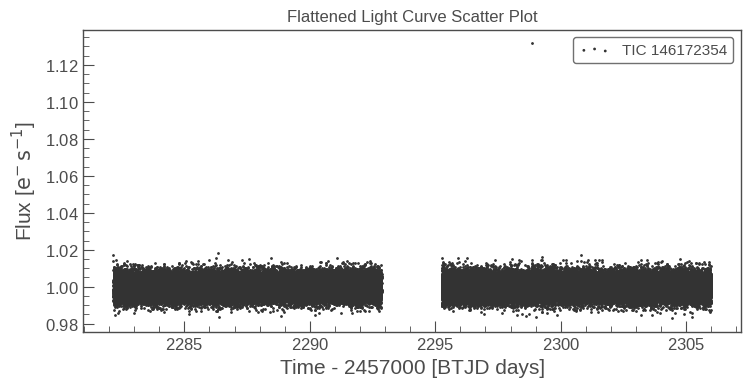

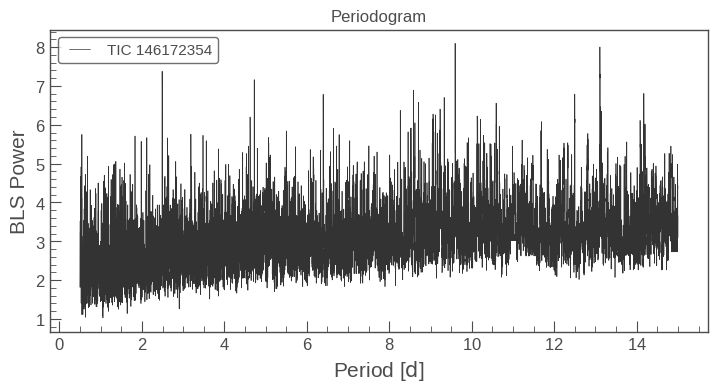

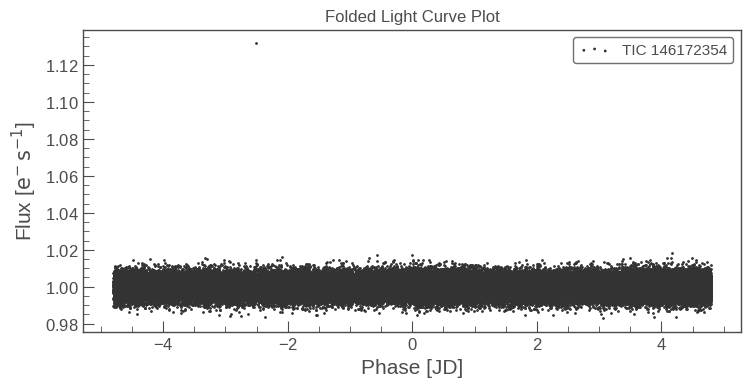

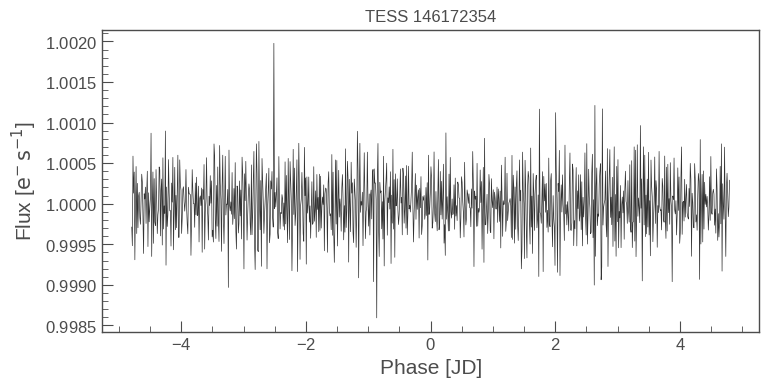

In [25]:
data = downloadTarget(star)
processTarget(star, data)

In this graph, we can see that the light coming from star stays at almost a constant intensity, and hence we can conclude that there is no exoplanet in the data. The periodogram and folding data concur the same.

## **Conclusion**

- TESS 149603524 might have an exoplanet revolving around it


## **Future Work**

- Automate the data collection and processing pipeline to make it easier to accept/reject stars as potential candidates.
- Develop ML and DL algorithms to classify potential targets.